# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets holdings
btc_holdings = 1.2
eth_holdings = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [5]:
# Fetch current BTC price
btc_data = requests.get(btc_url).json()
btc_price = btc_data['data']['1']['quotes']['USD']['price']
btc_price

# Fetch current ETH price
eth_data = requests.get(eth_url).json()
eth_price = eth_data['data']['1027']['quotes']['USD']['price']
eth_price

# Compute current value of my crpto wallet
my_btc_value = btc_holdings * btc_price
my_eth_value = eth_holdings * eth_price


# Print current crypto wallet balance
print(f"The current value of your {btc_holdings} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {eth_holdings} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $47592.00
The current value of your 5.3 ETH is $11743.63


In [6]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [7]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv('ALPACA_API_KEY')
alpaca_secret_key = os.getenv('ALPACA_SECRET_KEY')

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = 'v2'
)

In [8]:
# Format current date as ISO format
start_date = pd.Timestamp('2019-01-19', tz = 'America/New_York').isoformat()
end_date = pd.Timestamp('2024-01-19', tz = 'America/New_York').isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
ticker_data = alpaca.get_bars(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df
ticker_data

## Reorganize the DataFrame
# Separate ticker data
agg_data = ticker_data[ticker_data['symbol']=='AGG'].drop('symbol', axis = 1)
spy_data = ticker_data[ticker_data['symbol']=='SPY'].drop('symbol', axis = 1)

# Concatenate the AGG & SPY DataFrames
combined_df = pd.concat([agg_data, spy_data], axis = 1, keys = ['AGG', 'SPY'])

# Preview DataFrame
combined_df

AGG                                          \
                            close      high       low trade_count    open   
timestamp                                                                   
2019-01-22 05:00:00+00:00  106.44  106.6200  106.4400       16570  106.44   
2019-01-23 05:00:00+00:00  106.55  106.5900  106.3700       11639  106.38   
2019-01-24 05:00:00+00:00  106.73  106.8400  106.6700       14633  106.72   
2019-01-25 05:00:00+00:00  106.68  106.7000  106.5600       15541  106.64   
2019-01-28 05:00:00+00:00  106.62  106.7450  106.5800       17764  106.62   
...                           ...       ...       ...         ...     ...   
2024-01-12 05:00:00+00:00   99.10   99.3600   98.9600       26760   99.14   
2024-01-16 05:00:00+00:00   98.36   98.8500   98.2701       44947   98.72   
2024-01-17 05:00:00+00:00   98.09   98.2099   97.9400       30879   98.16   
2024-01-18 05:00:00+00:00   98.00   98.1950   97.8900       26014   98.16   
2024-01-19 05:00:00+00:00   98.02   98.0200   97.6714       32021   97.89   

                                                    SPY                      \
                             volume        vwap   close      high       low   
timestamp                                                                     
2019-01-22 05:00:00+00:00   7065826  106.528223  262.94  265.0600  261.0600   
2019-01-23 05:00:00+00:00   3473856  106.504969  263.35  264.7900  260.6600   
2019-01-24 05:00:00+00:00   7961374  106.741608  263.60  264.2000  262.0800   
2019-01-25 05:00:00+00:00   3633492  106.640407  265.78  266.7000  263.6595   
2019-01-28 05:00:00+00:00   8294535  106.634323  263.78  263.8300  261.7900   
...                             ...         ...     ...       ...       ...   
2024-01-12 05:00:00+00:00   6359407   99.109776  476.68  478.6000  475.2300   
2024-01-16 05:00:00+00:00  14489797   98.453263  474.93  476.6098  473.0600   
2024-01-17 05:00:00+00:00   8977600   98.087413  472.29  472.7900  469.8700   
2024-01-18 05:00:00+00:00  10575151   98.017836  476.49  477.0600  472.4200   
2024-01-19 05:00:00+00:00   9126091   97.904350  482.43  482.7200  476.5374   

                                                                      
                          trade_count    open     volume        vwap  
timestamp                                                             
2019-01-22 05:00:00+00:00      522147  264.82  117524932  262.946887  
2019-01-23 05:00:00+00:00      445442  264.01   87913109  262.805970  
2019-01-24 05:00:00+00:00      315574  263.21   61342224  263.264945  
2019-01-25 05:00:00+00:00      409292  265.61   98218282  265.862184  
2019-01-28 05:00:00+00:00      408382  263.39   87421778  263.369609  
...                               ...     ...        ...         ...  
2024-01-12 05:00:00+00:00      470201  477.84   57998192  476.587861  
2024-01-16 05:00:00+00:00      592233  475.26   85015070  474.916972  
2024-01-17 05:00:00+00:00      520417  471.82   68843871  471.773122  
2024-01-18 05:00:00+00:00      558708  474.01   91856348  474.745846  
2024-01-19 05:00:00+00:00      607546  477.65  110780877  479.965470  

[1258 rows x 14 columns]

In [9]:
# Pick AGG and SPY current close prices
agg_current_price = combined_df['AGG']['close'][-1]
spy_current_price = combined_df['SPY']['close'][-1]

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_current_price}")
print(f"Current SPY closing price: ${spy_current_price}")

Current AGG closing price: $98.02
Current SPY closing price: $482.43


In [10]:
# Compute the current value of shares
my_agg_value = my_agg * agg_current_price
my_spy_value = my_spy * spy_current_price

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $24121.50
The current value of your 200 AGG shares is $19604.00


### Savings Health Analysis

In [11]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
crypto_value = my_btc_value + my_eth_value
shares_value = my_agg_value + my_spy_value
my_port = crypto_value + shares_value
my_port

# Create savings DataFrame
df_savings = pd.DataFrame({'amount': [crypto_value, shares_value]}, index = ['crypto', 'shares'])

# Display savings DataFrame
display(df_savings)

,amount
crypto,59335.634
shares,43725.500


<Axes: ylabel='amount'>

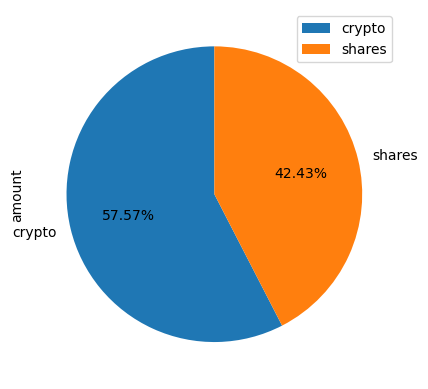

In [12]:
# Plot savings pie chart
df_savings.plot(kind = 'pie', y = 'amount', autopct = '%1.2f%%', startangle = 90)

In [13]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
savings = df_savings.sum()['amount']
savings

# Validate saving health
if savings > emergency_fund:
    print(f'Your savings of ${savings} are greater than your emergency fund goal of ${emergency_fund}. Congrats on having enough money!')
elif savings == emergency_fund:
    print(f'Your savings of ${savings} are equal to your emergency fund goal of ${emergency_fund}. Congrats on reaching your goal!')
else:
    print(f'Your portfolio value of ${savings} is less then your emergency fund goal of ${emergency_fund}. You need ${emergency_fund - savings} to reach your goal.')

Your savings of $103061.13399999999 are greater than your emergency fund goal of $36000. Congrats on having enough money!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [39]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2019-01-19', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2024-01-19', tz='America/New_York').isoformat()

In [40]:
# Get 5 years' worth of historical data for SPY and AGG
five_yr_df = alpaca.get_bars(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df
five_yr_df

# Reorganize the DataFrame
# Separate ticker data  # Already had this data separated above
five_yr_agg = five_yr_df[five_yr_df['symbol']=='AGG'].drop('symbol', axis = 1)
five_yr_spy = five_yr_df[five_yr_df['symbol']=='SPY'].drop('symbol', axis = 1)
five_yr_spy

# Concatenate the ticker DataFrames
combined_five_yr = pd.concat([five_yr_agg, five_yr_spy], axis = 1, keys = ['AGG', 'SPY'])

# Display sample data
combined_five_yr.head()

AGG                                       \
                            close     high     low trade_count    open   
timestamp                                                                
2019-01-22 05:00:00+00:00  106.44  106.620  106.44       16570  106.44   
2019-01-23 05:00:00+00:00  106.55  106.590  106.37       11639  106.38   
2019-01-24 05:00:00+00:00  106.73  106.840  106.67       14633  106.72   
2019-01-25 05:00:00+00:00  106.68  106.700  106.56       15541  106.64   
2019-01-28 05:00:00+00:00  106.62  106.745  106.58       17764  106.62   

                                                   SPY                    \
                            volume        vwap   close    high       low   
timestamp                                                                  
2019-01-22 05:00:00+00:00  7065826  106.528223  262.94  265.06  261.0600   
2019-01-23 05:00:00+00:00  3473856  106.504969  263.35  264.79  260.6600   
2019-01-24 05:00:00+00:00  7961374  106.741608  263.60  264.20  262.0800   
2019-01-25 05:00:00+00:00  3633492  106.640407  265.78  266.70  263.6595   
2019-01-28 05:00:00+00:00  8294535  106.634323  263.78  263.83  261.7900   

                                                                      
                          trade_count    open     volume        vwap  
timestamp                                                             
2019-01-22 05:00:00+00:00      522147  264.82  117524932  262.946887  
2019-01-23 05:00:00+00:00      445442  264.01   87913109  262.805970  
2019-01-24 05:00:00+00:00      315574  263.21   61342224  263.264945  
2019-01-25 05:00:00+00:00      409292  265.61   98218282  265.862184  
2019-01-28 05:00:00+00:00      408382  263.39   87421778  263.369609

In [41]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
portfolio_data = combined_five_yr
weights = [.40, .60]
num_sims = 500
num_trading_days = 252 * 30
type(num_trading_days)

MC_thirty_yrs = MCSimulation(
    portfolio_data,
    weights,
    num_sims,
    num_trading_days
)

In [42]:
# Printing the simulation input data
MC_thirty_yrs.portfolio_data.head()

AGG                                       \
                            close     high     low trade_count    open   
timestamp                                                                
2019-01-22 05:00:00+00:00  106.44  106.620  106.44       16570  106.44   
2019-01-23 05:00:00+00:00  106.55  106.590  106.37       11639  106.38   
2019-01-24 05:00:00+00:00  106.73  106.840  106.67       14633  106.72   
2019-01-25 05:00:00+00:00  106.68  106.700  106.56       15541  106.64   
2019-01-28 05:00:00+00:00  106.62  106.745  106.58       17764  106.62   

                                                                SPY          \
                            volume        vwap daily_return   close    high   
timestamp                                                                     
2019-01-22 05:00:00+00:00  7065826  106.528223          NaN  262.94  265.06   
2019-01-23 05:00:00+00:00  3473856  106.504969     0.001033  263.35  264.79   
2019-01-24 05:00:00+00:00  7961374  106.741608     0.001689  263.60  264.20   
2019-01-25 05:00:00+00:00  3633492  106.640407    -0.000468  265.78  266.70   
2019-01-28 05:00:00+00:00  8294535  106.634323    -0.000562  263.78  263.83   

                                                                    \
                                low trade_count    open     volume   
timestamp                                                            
2019-01-22 05:00:00+00:00  261.0600      522147  264.82  117524932   
2019-01-23 05:00:00+00:00  260.6600      445442  264.01   87913109   
2019-01-24 05:00:00+00:00  262.0800      315574  263.21   61342224   
2019-01-25 05:00:00+00:00  263.6595      409292  265.61   98218282   
2019-01-28 05:00:00+00:00  261.7900      408382  263.39   87421778   

                                                    
                                 vwap daily_return  
timestamp                                           
2019-01-22 05:00:00+00:00  262.946887          NaN  
2019-01-23 05:00:00+00:00  262.805970     0.001559  
2019-01-24 05:00:00+00:00  263.264945     0.000949  
2019-01-25 05:00:00+00:00  265.862184     0.008270  
2019-01-28 05:00:00+00:00  263.369609    -0.007525

In [43]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirty_yrs.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.011077,1.000616,0.990477,0.997860,1.002454,0.996118,1.025920,1.002789,1.003267,0.988523,...,0.994766,1.000419,1.001017,0.999658,0.997951,1.017426,0.994875,1.000372,1.005846,0.995363
2,1.010782,1.002579,0.971226,0.993893,1.005503,1.002557,1.025749,1.006224,1.012214,0.990550,...,1.004163,1.006499,1.002225,0.993293,0.984331,1.020219,1.005813,0.988884,1.007367,0.992750
3,1.012197,0.994389,0.957894,0.994738,1.008155,1.005159,1.041270,1.004099,1.011324,0.990181,...,1.006227,0.999531,1.010830,0.990852,0.992462,1.021171,1.005364,0.987947,1.005590,1.007000
4,1.028545,0.990962,0.961462,0.992162,1.008812,1.001455,1.035878,1.001743,0.999489,0.986785,...,0.997925,0.983006,1.009109,0.995308,1.006206,1.015534,0.999600,0.975833,1.012398,0.986182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,7.476448,10.326890,1.758639,38.270228,25.276094,5.517565,12.257307,14.164361,6.261548,13.694577,...,12.855319,6.507033,11.871324,7.140214,6.755326,6.836293,13.731777,7.035490,4.964128,4.459718
7557,7.522977,10.465673,1.790039,38.386998,25.476662,5.552900,12.268198,14.138513,6.246983,13.601761,...,12.893119,6.523897,11.731983,7.117896,6.747160,6.832329,13.725399,6.970707,4.940005,4.482815
7558,7.505760,10.483933,1.802776,37.781701,25.254283,5.557886,12.274067,14.325563,6.228776,13.631407,...,12.937077,6.541334,11.688872,7.093110,6.806215,6.815082,13.691986,7.014097,4.942092,4.495466
7559,7.472186,10.543729,1.797100,37.974126,25.050009,5.559836,12.271271,14.373736,6.358551,13.462581,...,12.979733,6.517590,11.711014,7.166878,6.826818,6.811078,13.685303,6.989589,4.905020,4.493283


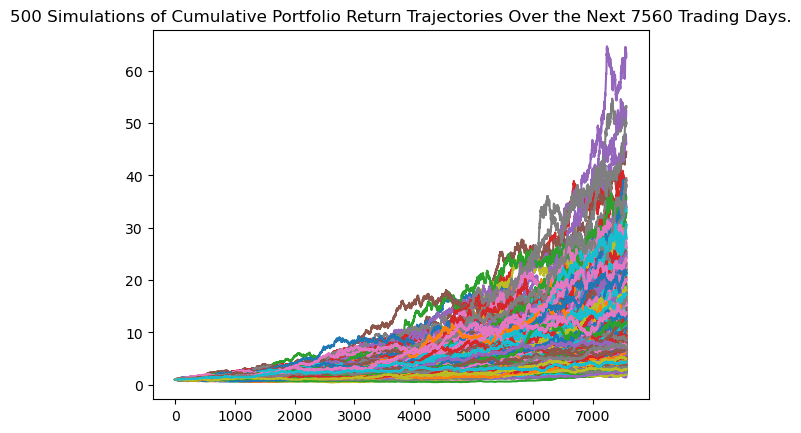

In [44]:
# Plot simulation outcomes
line_plot = MC_thirty_yrs.plot_simulation()

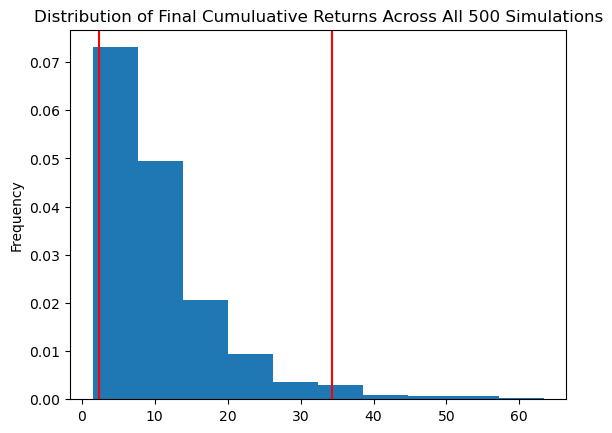

In [45]:
# Plot probability distribution and confidence intervals
dist_plot = MC_thirty_yrs.plot_distribution()

### Retirement Analysis

In [46]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_tbl = MC_thirty_yrs.summarize_cumulative_return()

# Print summary statistics
print(summary_tbl)

count           500.000000
mean             10.952365
std               8.487001
min               1.497727
25%               5.573661
50%               8.316919
75%              13.625068
max              63.349899
95% CI Lower      2.357903
95% CI Upper     34.252949
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [47]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
thirty_yr_lower_ci = round(summary_tbl[8] * initial_investment, 2)
thirty_yr_upper_ci = round(summary_tbl[9] * initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${thirty_yr_lower_ci} and ${thirty_yr_upper_ci}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $47158.06 and $685058.98


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [48]:
# Set new initial investment
new_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
thirty_yr_lower_ci = round(summary_tbl[8] * new_investment, 2)
thirty_yr_upper_ci = round(summary_tbl[9] * new_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${thirty_yr_lower_ci} and ${thirty_yr_upper_ci}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $70737.1 and $1027588.47


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [49]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
five_yr_trading_days = 252 * 5

# Set trading days in this cell but reused variables from 30 year simulation.
MC_five_yrs = MCSimulation(
    portfolio_data,
    weights,
    num_sims,
    five_yr_trading_days
)

In [50]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_five_yrs.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.995296,0.989303,1.006654,0.983980,1.000060,0.995126,1.007116,0.991191,1.008218,1.011974,...,1.000354,1.003285,1.010760,0.985086,0.998198,1.002490,0.992058,1.001040,1.012395,1.010798
2,0.977677,0.993922,1.009613,0.977184,1.001587,0.999025,1.013760,0.985142,1.022085,1.021711,...,0.992958,0.998121,1.008439,0.989114,1.007174,0.993120,0.996770,1.012106,1.021462,1.016615
3,0.980276,1.004625,1.009911,0.985073,1.003197,1.002597,1.012693,0.973246,1.014018,1.032874,...,0.995264,0.996249,1.006872,0.986245,1.018357,0.989837,0.995927,1.013189,1.018914,1.019872
4,0.963792,1.018618,1.016139,0.995031,0.999780,0.993523,1.015961,0.979122,1.029400,1.033129,...,0.986949,1.004234,1.002836,0.985055,1.022709,0.985778,0.995787,1.012876,1.023886,1.025079
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.059109,1.127178,1.767558,1.178191,1.403880,0.959929,1.249667,1.704113,1.794021,1.220091,...,1.316751,1.143664,1.418056,1.658559,1.718765,1.822954,1.150635,0.842959,1.070013,2.586402
1257,1.053485,1.126995,1.753367,1.188423,1.405398,0.968239,1.251144,1.721062,1.791320,1.211726,...,1.323389,1.125281,1.406425,1.664130,1.699915,1.833464,1.140428,0.838751,1.082319,2.617062
1258,1.058969,1.144959,1.771613,1.192070,1.420513,0.978745,1.249668,1.719465,1.796215,1.203708,...,1.323339,1.130914,1.417904,1.675761,1.719310,1.836635,1.127567,0.830063,1.077950,2.612454
1259,1.065612,1.129637,1.797925,1.205873,1.409962,0.971073,1.247635,1.715118,1.779772,1.212344,...,1.314887,1.138698,1.433404,1.676437,1.723005,1.834820,1.115389,0.817495,1.062521,2.595165


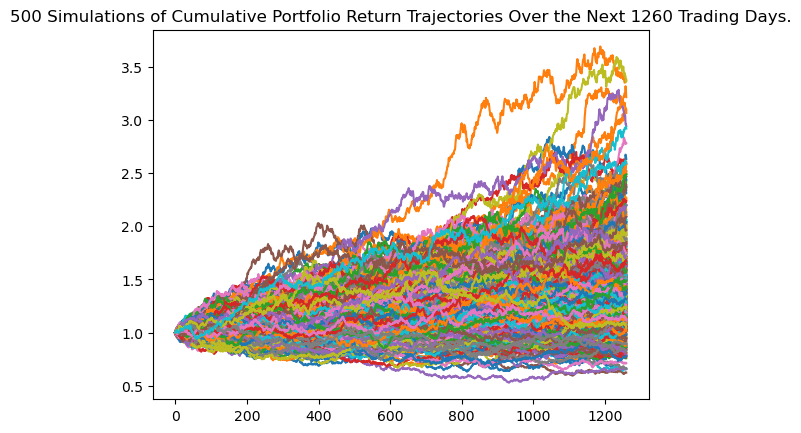

In [51]:
# Plot simulation outcomes
five_yr_plot = MC_five_yrs.plot_simulation()

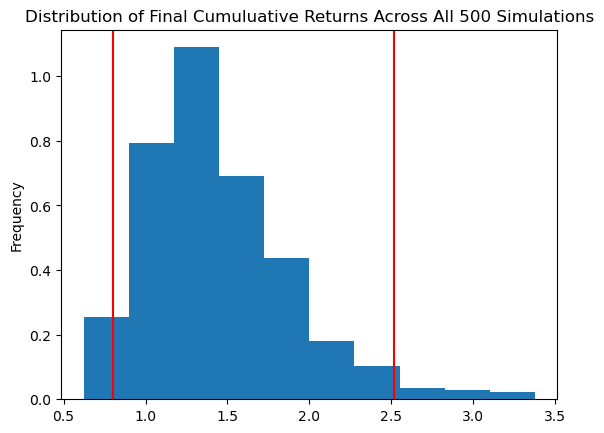

In [52]:
# Plot probability distribution and confidence intervals
five_yr_dist = MC_five_yrs.plot_distribution()

In [53]:
# Fetch summary statistics from the Monte Carlo simulation results
five_yr_summary = MC_five_yrs.summarize_cumulative_return()

# Print summary statistics
print(five_yr_summary)

count           500.000000
mean              1.448286
std               0.444887
min               0.623741
25%               1.143618
50%               1.366045
75%               1.675212
max               3.376908
95% CI Lower      0.800025
95% CI Upper      2.515961
Name: 1260, dtype: float64


In [54]:
# Set initial investment
# We'll keep the same initial_investment of $20,000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
five_year_lower = round(five_yr_summary[8] * initial_investment, 2)
five_year_upper = round(five_yr_summary[9] * initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${five_year_lower} and ${five_year_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 5 years will end within in the range of $16000.5 and $50319.22


### Ten Years Retirement Option

In [55]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
ten_yr_trading_days = 252 * 5

# Set trading days in this cell but reused variables from 30 year simulation.
MC_ten_yrs = MCSimulation(
    portfolio_data,
    weights,
    num_sims,
    ten_yr_trading_days
)

In [56]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten_yrs.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.998737,1.003737,1.016600,0.985324,0.990398,1.011877,0.993002,1.009106,1.000293,0.993848,...,0.995820,1.006310,0.999391,0.996901,1.000851,0.988583,0.998793,0.998093,0.993410,0.989484
2,0.998434,0.992280,1.024329,0.985370,0.993145,1.013025,0.992039,1.002330,1.002424,0.998876,...,0.991586,1.004462,1.004467,0.976760,0.998029,0.990991,0.989429,1.002129,0.988507,0.987933
3,0.992815,0.988752,1.027433,0.994057,0.991740,1.012907,0.994976,1.009260,1.002330,0.994810,...,1.001069,1.007600,1.013840,0.983744,0.986190,0.998081,0.988548,1.000835,0.989695,0.992477
4,1.003609,0.988392,1.027667,0.993529,1.000079,1.015102,0.988955,1.002355,1.012042,1.000839,...,1.004857,1.002995,1.022427,0.986003,0.995408,0.994240,0.986105,0.991312,0.982933,0.989444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,2.553101,1.937953,1.702475,0.835721,1.631961,1.365372,1.696233,0.872810,1.937184,1.040378,...,1.916227,0.842125,1.494921,0.939903,1.235988,1.081126,1.118086,2.136976,1.801976,1.382995
1257,2.578514,1.921639,1.715813,0.842300,1.645432,1.378083,1.683464,0.872974,1.933450,1.054580,...,1.900730,0.840953,1.475595,0.946932,1.231424,1.096467,1.128772,2.133668,1.804466,1.401653
1258,2.595592,1.938758,1.713419,0.846782,1.655345,1.383488,1.679967,0.868573,1.917029,1.060378,...,1.881946,0.841830,1.455560,0.953928,1.228472,1.104963,1.117610,2.120624,1.802587,1.395990
1259,2.572886,1.935861,1.704964,0.850315,1.635155,1.397533,1.666132,0.879205,1.931784,1.045502,...,1.879343,0.835323,1.463703,0.951255,1.229158,1.100141,1.112152,2.149508,1.793246,1.412079


<Axes: title={'center': '500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 1260 Trading Days.'}>

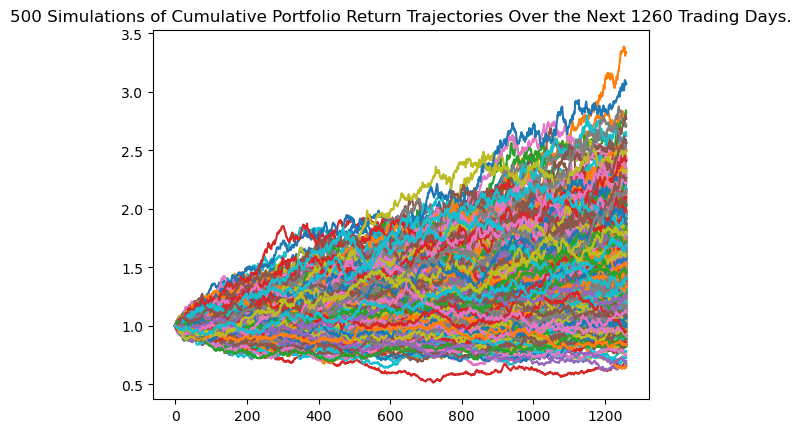

In [57]:
# Plot simulation outcomes
MC_ten_yrs.plot_simulation()

<Axes: title={'center': 'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

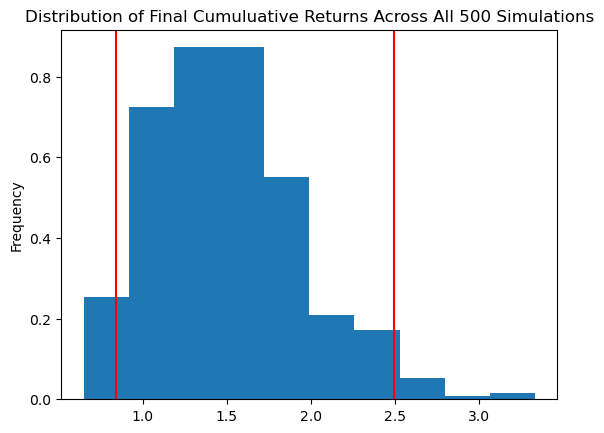

In [58]:
# Plot probability distribution and confidence intervals
MC_ten_yrs.plot_distribution()

In [59]:
# Fetch summary statistics from the Monte Carlo simulation results
ten_year_summary = MC_ten_yrs.summarize_cumulative_return()

# Print summary statistics
print(ten_year_summary)

count           500.000000
mean              1.499963
std               0.435609
min               0.650955
25%               1.168755
50%               1.456632
75%               1.762388
max               3.333095
95% CI Lower      0.840699
95% CI Upper      2.494005
Name: 1260, dtype: float64


In [60]:
# Set initial investment
# We'll use the same initial_investment again

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ten_yr_lower = round(ten_year_summary[8] * initial_investment, 2)
ten_yr_upper = round(ten_year_summary[9] * initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ten_yr_lower} and ${ten_yr_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 10 years will end within in the range of $16813.98 and $49880.1


In [65]:
# Combined all returns into 1 dataframe for easier analysis
agg_ci_rtns = {
    '30 Yr Lower': [thirty_yr_lower_ci],
    '30 Yr Upper': [thirty_yr_upper_ci], 
    '5 Yr Lower': [five_year_lower],
    '5 Yr Upper': [five_year_upper],
    '10 Yr Lower': [ten_yr_lower],
    '10 Yr Upper': [ten_yr_upper]
}
agg_ci_rtns

{'30 Yr Lower': [70737.1],
 '30 Yr Upper': [1027588.47],
 '5 Yr Lower': [16000.5],
 '5 Yr Upper': [50319.22],
 '10 Yr Lower': [16813.98],
 '10 Yr Upper': [49880.1]}